# **TASK 1 - Prediction using Supervised ML**

#### Title: PERCENTAGE OF A STUDENT BASED ON NO. OF STUDY HOURS
Dataset: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv



In [12]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head() #Viewing first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploratory Data Analysis

In [14]:
df.tail() #Viewing last 5 rows of the dataset

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
df.shape #Size of the table

(25, 2)

In [16]:
df.info() #information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
df.describe() #description of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [18]:
df.isnull == True #checking whether any null value

False

In [24]:
df.corr() #finding correlation between columns

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## **Data** **Visualization**

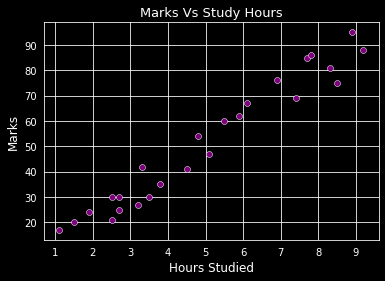

In [31]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
sns.scatterplot(y= df['Scores'], x= df['Hours'], color="purple")
plt.title('Marks Vs Study Hours',size=13)
plt.ylabel('Marks', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


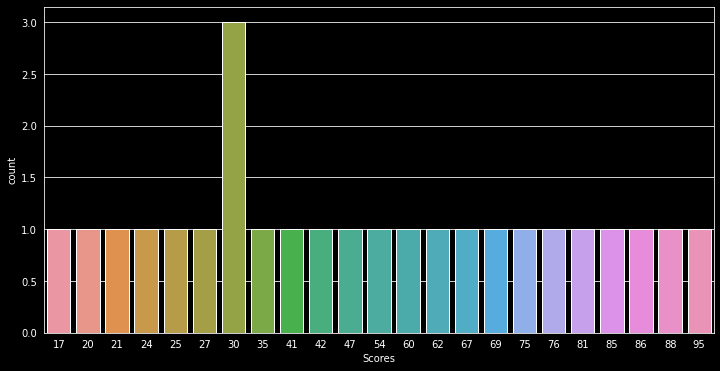

In [35]:
plt.figure(figsize = (12,6))
sns.countplot(df['Scores'])
plt.show()

In [40]:
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [41]:
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

### **Data** **Spliting**

In [46]:
# Defining X and y from the Data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values


In [53]:
# Spliting the Data in two
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [56]:
x_train.shape

(20, 1)

In [57]:
x_test.shape

(5, 1)

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Score')

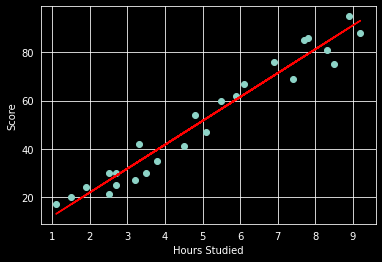

In [59]:
plt.scatter(X,y)
plt.plot(X,regressor.coef_*X+regressor.intercept_,'-r')
plt.xlabel('Hours Studied')
plt.ylabel('Score')

In [61]:
y_pred =regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [62]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [63]:
# testing own values
Hours=np.array([[9.25]])
predict = regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score ={}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score =93.69173248737539


In [64]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
